# Analysis of Crime Data in Cuyahoga County

In [3766]:
%matplotlib inline
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from citipy import citipy
import numpy as np
from scipy.stats import linregress


#from api_keys import weather_api_key
#from api_keys import fbi_key
#from api_keys import crime_key


In [3767]:
crime_2017 = pd.read_csv("ocjs_crimebycounty2017.csv")
crime_2017.head()

FileNotFoundError: [Errno 2] File ocjs_crimebycounty2017.csv does not exist: 'ocjs_crimebycounty2017.csv'

In [3768]:
cuy_crime=crime_2017.loc[153:199, :].reset_index(drop=True)
cuy_crime.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH018A1,NOTRE DAME COLLEGE,NaN,2,38,NaN,2,NaN,NaN,9,29,NaN,NaN
2,OH01801,BAY VILLAGE,"15,327",2,73,NaN,1,NaN,1,11,61,1,NaN
3,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,NaN
4,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,NaN


In [3769]:
cuy_crime_null=cuy_crime.fillna(0)
cuy_crime_null.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH018A1,NOTRE DAME COLLEGE,0,2,38,0.0,2,0,0,9,29,0,0
2,OH01801,BAY VILLAGE,"15,327",2,73,0.0,1,0,1,11,61,1,0
3,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,0
4,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,0


In [3770]:
cuy_data=cuy_crime_null.drop(cuy_crime_null[cuy_crime_null["POPULATION"]==0].index).reset_index(drop=True)
cuy_data.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH01801,BAY VILLAGE,"15,327",2,73,0.0,1,0,1,11,61,1,0
2,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,0
3,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,0
4,OH01806,BEREA,"18,871",8,140,0.0,1,1,6,27,105,8,2


In [3771]:
cuy_data.sort_values(by="POPULATION", ascending=False, na_position="first")
cuy_data

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH01801,BAY VILLAGE,"15,327",2,73,0.0,1,0,1,11,61,1,0
2,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,0
3,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,0
4,OH01806,BEREA,"18,871",8,140,0.0,1,1,6,27,105,8,2
5,OH01808,BRECKSVILLE,"13,432",2,52,0.0,1,0,1,4,47,1,0
6,OH01809,BROADVIEW HEIGHTS,"19,228",1,21,0.0,0,0,1,5,11,5,0
7,OH01810,BROOKLYN,"10,809",23,677,1.0,5,11,6,31,612,34,0
8,OH01813,CHAGRIN FALLS,"3,991",2,39,0.0,1,0,1,3,36,0,0
9,OH01815,CLEVELAND HEIGHTS,"44,525",131,879,2.0,16,79,34,125,655,99,1


In [3772]:
#Get a list of headers
for col in cuy_data.columns:
        print(col) 

ORI
AGENCY NAME
POPULATION
VIOLENT CRIME
PROPERTY CRIME
MURDER
RAPE
ROBBERY
AGGRAVATED ASSAULT
BURGLARY
LARCENY
MTR VEHICLE THEFT
ARSON


In [3773]:
#Summary of cuy_data_df
cuy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORI                 42 non-null     object 
 1   AGENCY NAME         42 non-null     object 
 2   POPULATION          42 non-null     object 
 3   VIOLENT CRIME       42 non-null     object 
 4   PROPERTY CRIME      42 non-null     object 
 5   MURDER              42 non-null     float64
 6   RAPE                42 non-null     object 
 7   ROBBERY             42 non-null     object 
 8   AGGRAVATED ASSAULT  42 non-null     object 
 9   BURGLARY            42 non-null     object 
 10  LARCENY             42 non-null     object 
 11  MTR VEHICLE THEFT   42 non-null     object 
 12  ARSON               42 non-null     object 
dtypes: float64(1), object(12)
memory usage: 4.4+ KB


In [3774]:
#df.replace(',','', regex=True, inplace=True)
#Remove commas from numerical values to change values to integers
cuy_data.replace(',','', regex=True, inplace=True)
cuy_data.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,385351,5999,18944,107.0,497,2697,2698,5853,9696,3395,253
1,OH01801,BAY VILLAGE,15327,2,73,0.0,1,0,1,11,61,1,0
2,OH01803,BEDFORD,12641,25,228,1.0,1,16,7,50,146,32,0
3,OH01804,BEDFORD HEIGHTS,10558,22,255,1.0,1,9,11,32,173,50,0
4,OH01806,BEREA,18871,8,140,0.0,1,1,6,27,105,8,2


In [3775]:
#Option 1:  df["a"] = df["a"].astype(str).astype(int)
#Option 2:  cuy_data["POPULATION"] = cuy_data["POPULATION"].astype(str).astype(int)
#Option 3:  pd.to_numeric(s, errors='coerce')

cuy_data["POPULATION"]=pd.to_numeric(cuy_data["POPULATION"])
cuy_data["VIOLENT CRIME"]=pd.to_numeric(cuy_data["VIOLENT CRIME"])
cuy_data["PROPERTY CRIME"]=pd.to_numeric(cuy_data["PROPERTY CRIME"])
cuy_data["MURDER"]=pd.to_numeric(cuy_data["MURDER"])
cuy_data["RAPE"]=pd.to_numeric(cuy_data["RAPE"])
cuy_data["ROBBERY"]=pd.to_numeric(cuy_data["ROBBERY"])
cuy_data["AGGRAVATED ASSAULT"]=pd.to_numeric(cuy_data["AGGRAVATED ASSAULT"])
cuy_data["BURGLARY"]=pd.to_numeric(cuy_data["BURGLARY"])
cuy_data["LARCENY"]=pd.to_numeric(cuy_data["LARCENY"])
cuy_data["MTR VEHICLE THEFT"]=pd.to_numeric(cuy_data["MTR VEHICLE THEFT"])
cuy_data["ARSON"]=pd.to_numeric(cuy_data["ARSON"])


#Summary of cuy_data_df
cuy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORI                 42 non-null     object 
 1   AGENCY NAME         42 non-null     object 
 2   POPULATION          42 non-null     int64  
 3   VIOLENT CRIME       42 non-null     int64  
 4   PROPERTY CRIME      42 non-null     int64  
 5   MURDER              42 non-null     float64
 6   RAPE                42 non-null     int64  
 7   ROBBERY             42 non-null     int64  
 8   AGGRAVATED ASSAULT  42 non-null     int64  
 9   BURGLARY            42 non-null     int64  
 10  LARCENY             42 non-null     int64  
 11  MTR VEHICLE THEFT   42 non-null     int64  
 12  ARSON               42 non-null     int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 4.4+ KB


In [3776]:
#Crime_Totals= list(cuy_data)
##Crime_Totals.remove('POPULATION')
#Crime_Totals.remove('TOTALS')
#Crime_Totals
#cuy_data
cuy_data


,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,385351,5999,18944,107.0,497,2697,2698,5853,9696,3395,253
1,OH01801,BAY VILLAGE,15327,2,73,0.0,1,0,1,11,61,1,0
2,OH01803,BEDFORD,12641,25,228,1.0,1,16,7,50,146,32,0
3,OH01804,BEDFORD HEIGHTS,10558,22,255,1.0,1,9,11,32,173,50,0
4,OH01806,BEREA,18871,8,140,0.0,1,1,6,27,105,8,2
5,OH01808,BRECKSVILLE,13432,2,52,0.0,1,0,1,4,47,1,0
6,OH01809,BROADVIEW HEIGHTS,19228,1,21,0.0,0,0,1,5,11,5,0
7,OH01810,BROOKLYN,10809,23,677,1.0,5,11,6,31,612,34,0
8,OH01813,CHAGRIN FALLS,3991,2,39,0.0,1,0,1,3,36,0,0
9,OH01815,CLEVELAND HEIGHTS,44525,131,879,2.0,16,79,34,125,655,99,1


In [3777]:
#cuy_data.eval('TOTALS = VIOLENT CRIME + PROPERTY CRIME + MURDER + RAPE + ROBBER + AGGRAVATED ASSAULT + BURGLARY + LARCENY + MTR VEHICLE THEFT + ARSON')

cuy_data['TOTALS'] = cuy_data.drop('POPULATION', axis=1).sum(axis=1)
cuy_data

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON,TOTALS
0,OHCLP00,CLEVELAND,385351,5999,18944,107.0,497,2697,2698,5853,9696,3395,253,50139.0
1,OH01801,BAY VILLAGE,15327,2,73,0.0,1,0,1,11,61,1,0,150.0
2,OH01803,BEDFORD,12641,25,228,1.0,1,16,7,50,146,32,0,506.0
3,OH01804,BEDFORD HEIGHTS,10558,22,255,1.0,1,9,11,32,173,50,0,554.0
4,OH01806,BEREA,18871,8,140,0.0,1,1,6,27,105,8,2,298.0
5,OH01808,BRECKSVILLE,13432,2,52,0.0,1,0,1,4,47,1,0,108.0
6,OH01809,BROADVIEW HEIGHTS,19228,1,21,0.0,0,0,1,5,11,5,0,44.0
7,OH01810,BROOKLYN,10809,23,677,1.0,5,11,6,31,612,34,0,1400.0
8,OH01813,CHAGRIN FALLS,3991,2,39,0.0,1,0,1,3,36,0,0,82.0
9,OH01815,CLEVELAND HEIGHTS,44525,131,879,2.0,16,79,34,125,655,99,1,2021.0


In [3778]:
#Totals = cuy_data.sum(axis=1)
#cuy_data['TOTALS']=Totals


#cuy_data.head()

In [3779]:
cuy_totals=cuy_data.sort_values(by="TOTALS", ascending=False, na_position="first")
cuy_totals

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON,TOTALS
0,OHCLP00,CLEVELAND,385351,5999,18944,107.0,497,2697,2698,5853,9696,3395,253,50139.0
11,OH01818,EUCLID,47270,303,1267,4.0,26,118,155,226,910,131,6,3146.0
18,OH01826,LAKEWOOD,50151,74,1199,2.0,6,40,26,469,652,78,5,2551.0
26,OH01842,PARMA,79340,141,906,0.0,39,37,65,199,633,74,2,2096.0
9,OH01815,CLEVELAND HEIGHTS,44525,131,879,2.0,16,79,34,125,655,99,1,2021.0
34,OH01851,STRONGSVILLE,44758,18,852,2.0,1,9,6,67,760,25,0,1740.0
7,OH01810,BROOKLYN,10809,23,677,1.0,5,11,6,31,612,34,0,1400.0
33,OH01850,SOUTH EUCLID,21628,33,645,0.0,5,14,14,74,536,35,0,1356.0
22,OH01834,NORTH OLMSTED,31779,26,470,0.0,6,11,9,40,398,32,0,992.0
10,OH01817,EAST CLEVELAND,17178,136,339,5.0,8,83,40,100,89,150,3,953.0


In [3780]:
cuy_population=cuy_totals.sort_values(by="POPULATION", ascending=False, na_position="first")
cuy_population

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON,TOTALS
0,OHCLP00,CLEVELAND,385351,5999,18944,107.0,497,2697,2698,5853,9696,3395,253,50139.0
26,OH01842,PARMA,79340,141,906,0.0,39,37,65,199,633,74,2,2096.0
18,OH01826,LAKEWOOD,50151,74,1199,2.0,6,40,26,469,652,78,5,2551.0
11,OH01818,EUCLID,47270,303,1267,4.0,26,118,155,226,910,131,6,3146.0
34,OH01851,STRONGSVILLE,44758,18,852,2.0,1,9,6,67,760,25,0,1740.0
9,OH01815,CLEVELAND HEIGHTS,44525,131,879,2.0,16,79,34,125,655,99,1,2021.0
39,OH01857,WESTLAKE,32330,13,366,0.0,1,9,3,25,326,15,0,758.0
22,OH01834,NORTH OLMSTED,31779,26,470,0.0,6,11,9,40,398,32,0,992.0
23,OH01836,NORTH ROYALTON,30313,7,103,3.0,0,0,4,22,80,1,0,220.0
13,OH01820,GARFIELD HEIGHTS,27846,0,0,0.0,0,0,0,0,0,0,0,0.0


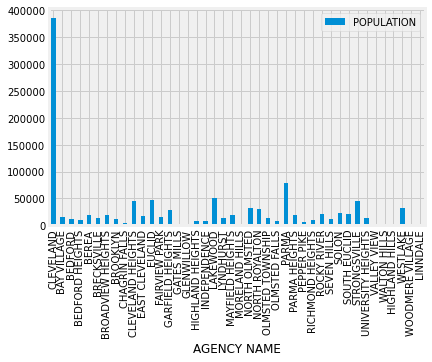

In [3781]:
cuy_data.plot.bar(x="AGENCY NAME", y="POPULATION")


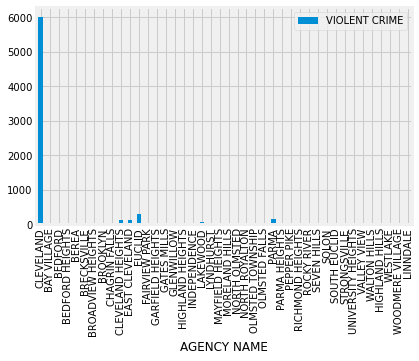

In [3782]:
cuy_data.plot.bar(x="AGENCY NAME", y="VIOLENT CRIME")

In [3783]:
#cuy_data.plot(x="AGENCY NAME", y="POPULATION")
#plt.xticks(rotation=90, horizontalalignment="center")

In [3784]:
#cuy_data.plot(x="AGENCY NAME", y="VIOLENT CRIME")
#plt.xticks(rotation=90, horizontalalignment="center")

In [3785]:
#cuy_data.plot(x="AGENCY NAME", y="VIOLENT CRIME")
#plt.xticks(rotation=90, horizontalalignment="center")

In [3786]:
# #create figure to display bar plots
# fig = plt.figure(figsize=(50, 30))

# #Define Subplots
# subplot1 = fig.add_subplot(2, 3, 1)
# subplot2 = fig.add_subplot(2, 3, 2)

# #Choose Matplotlib Theme
# import matplotlib
# matplotlib.style.use('fivethirtyeight')

# plt.bar("AGENCY NAME", "POPULATION", data = Agency_Name, color = "blue")
# plt.xticks(rotation=80, horizontalalignment="center")
# plt.xlabel("AGENCY NAME")
# plt.ylabel("POPULATION")
# plt.title("Population Density per Agency")
# plt.show()


# #Choose Matplotlib Theme
# import matplotlib
# matplotlib.style.use('fivethirtyeight')

# plt.bar("AGENCY NAME", "VIOLENT CRIME", data = Agency_Name, color = "blue")
# plt.xticks(rotation=80, horizontalalignment="center")
# plt.xlabel("AGENCY NAME")
# plt.ylabel("VIOLENT CRIME")
# plt.title("Violent Crime per Agency")
# plt.show()


In [3787]:
#Choose Matplotlib Theme
#import matplotlib
#matplotlib.style.use('fivethirtyeight')

#Declare x and y
#x = [Agency_Name, "AGENCY NAME"]
#y = [Agency_Name, "POPULATION"]

# Create a sample dataframe with an text index
#plotdata = pd.DataFrame(cuy_data_df)

#plt.bar("AGENCY NAME", "POPULATION", data = cuy_data_df, color = "blue")

#plt.xticks(fontsize = 6, rotation=90, horizontalalignment="center")
#plt.yticks(fontsize = 6)
#plt.xlabel("AGENCY NAME", fontsize = 10)
# plt.ylabel("POPULATION", fontsize = 10)
# plt.title("Population Density per Agency")
# plt.savefig('Population by Agency.jpg', bbox_inches = 'tight')
# plt.show()

Text(0, 0.5, 'POPULATION & VIOLENT CRIME')

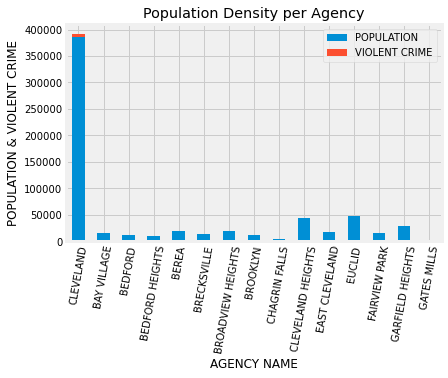

In [3788]:
# Stacked Plot
plotdata = pd.DataFrame({"POPULATION": [385351, 15327, 12641, 10558, 18871, 13432, 19228, 10809, 3991, 44525, 17178, 47270, 16307, 27846, 2232], "VIOLENT CRIME": [5999, 2, 25, 22, 8, 2, 1, 23, 2, 131, 136, 303, 18, 0, 2]},index=["CLEVELAND", "BAY VILLAGE", "BEDFORD", "BEDFORD HEIGHTS", "BEREA", "BRECKSVILLE", "BROADVIEW HEIGHTS", "BROOKLYN", "CHAGRIN FALLS", "CLEVELAND HEIGHTS", "EAST CLEVELAND", "EUCLID", "FAIRVIEW PARK", "GARFIELD HEIGHTS", "GATES MILLS"])

# Rotate the x-labels by 80 degrees, and keep the text aligned horizontally and add labels
plotdata.plot(kind="bar", title="Population Density & Violent Crime per Agency", stacked=True)
plt.xticks(rotation=80, horizontalalignment="center")
plt.title("Population Density per Agency")
plt.xlabel("AGENCY NAME")
plt.ylabel("POPULATION & VIOLENT CRIME")

In [3789]:
#State UCR Crime Data for 2018
year_state=f"https://api.usa.gov/crime/fbi/sapi/api/summarized/estimates/states/OH/2018/2018?api_key={fbi_key}"
response=requests.get(year_state).json()
print(json.dumps(response, indent=4, sort_keys=True))

NameError: name 'fbi_key' is not defined

In [3790]:
#

In [3791]:
#

In [3792]:
#

In [3793]:
#